<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: ARIMA
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 6 de Noviembre 2024 <br>

* * *

<br>
<br>

# ARIMA

https://nixtlaverse.nixtla.io/statsforecast/docs/models/arima.html#explore-data-with-the-plot-method

In [1]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [2]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel("/content/drive/MyDrive/series_tiempo/Assets/remesas banxico.xlsx")

Mounted at /content/drive


In [3]:
df = pd.DataFrame({"ds": data["Fecha"], "y": data["Value"], "unique_id": "Remesas"})
df.head()

,ds,y,unique_id
0,1995-01-01,254.5724,Remesas
1,1995-02-01,248.0605,Remesas
2,1995-03-01,287.3645,Remesas
3,1995-04-01,298.9135,Remesas
4,1995-05-01,357.7396,Remesas


In [4]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


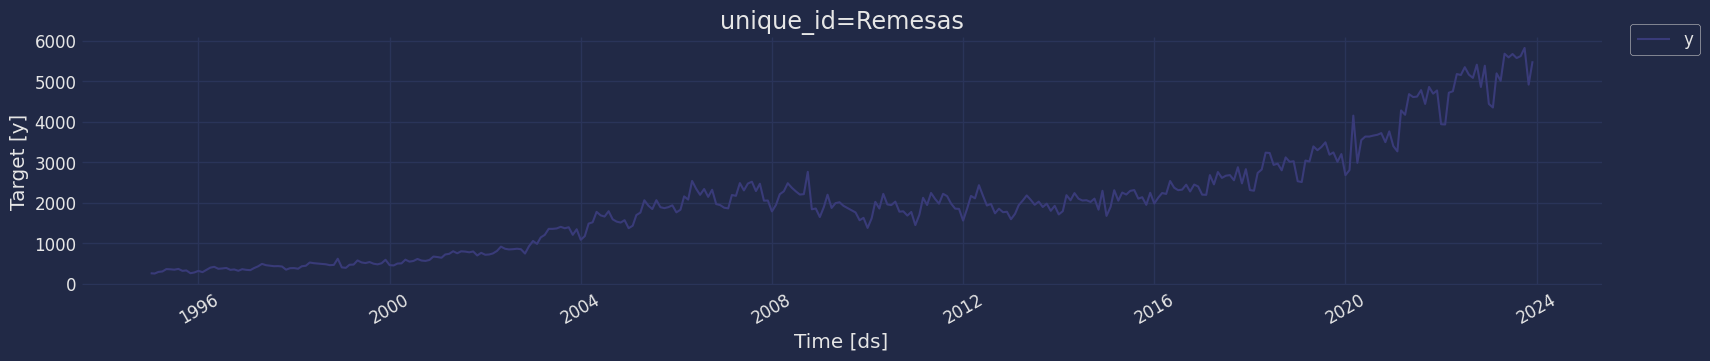

In [5]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

,y
count,348.000000
mean,1993.306029
std,1313.988198
min,248.060500
25%,797.831625
50%,1933.930150
75%,2453.371275
max,5817.827200


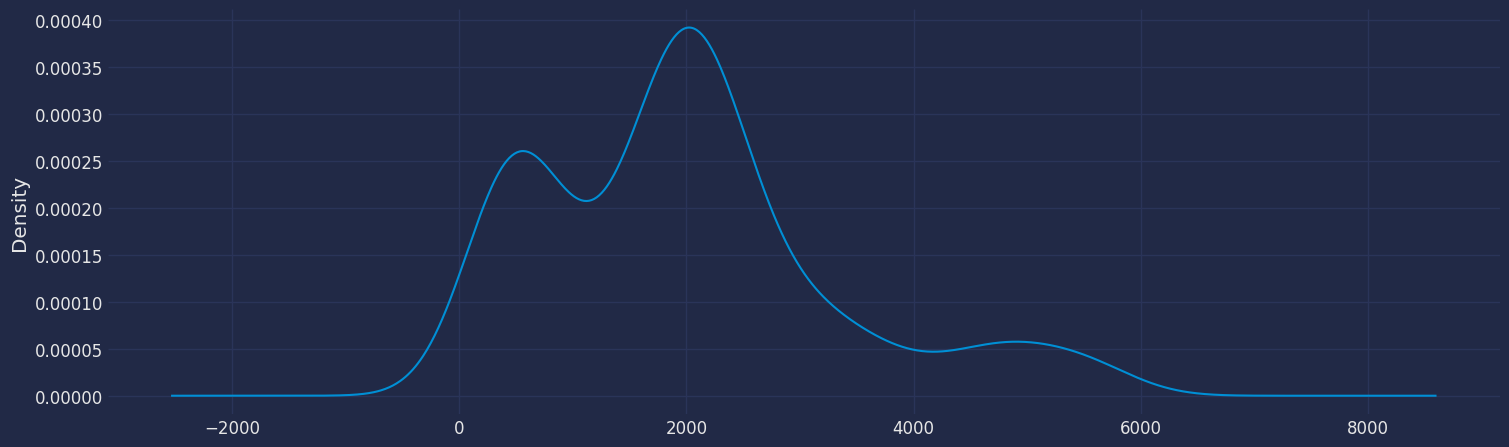

In [6]:
df["y"].plot(kind='kde',figsize = (16,5))
df["y"].describe()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

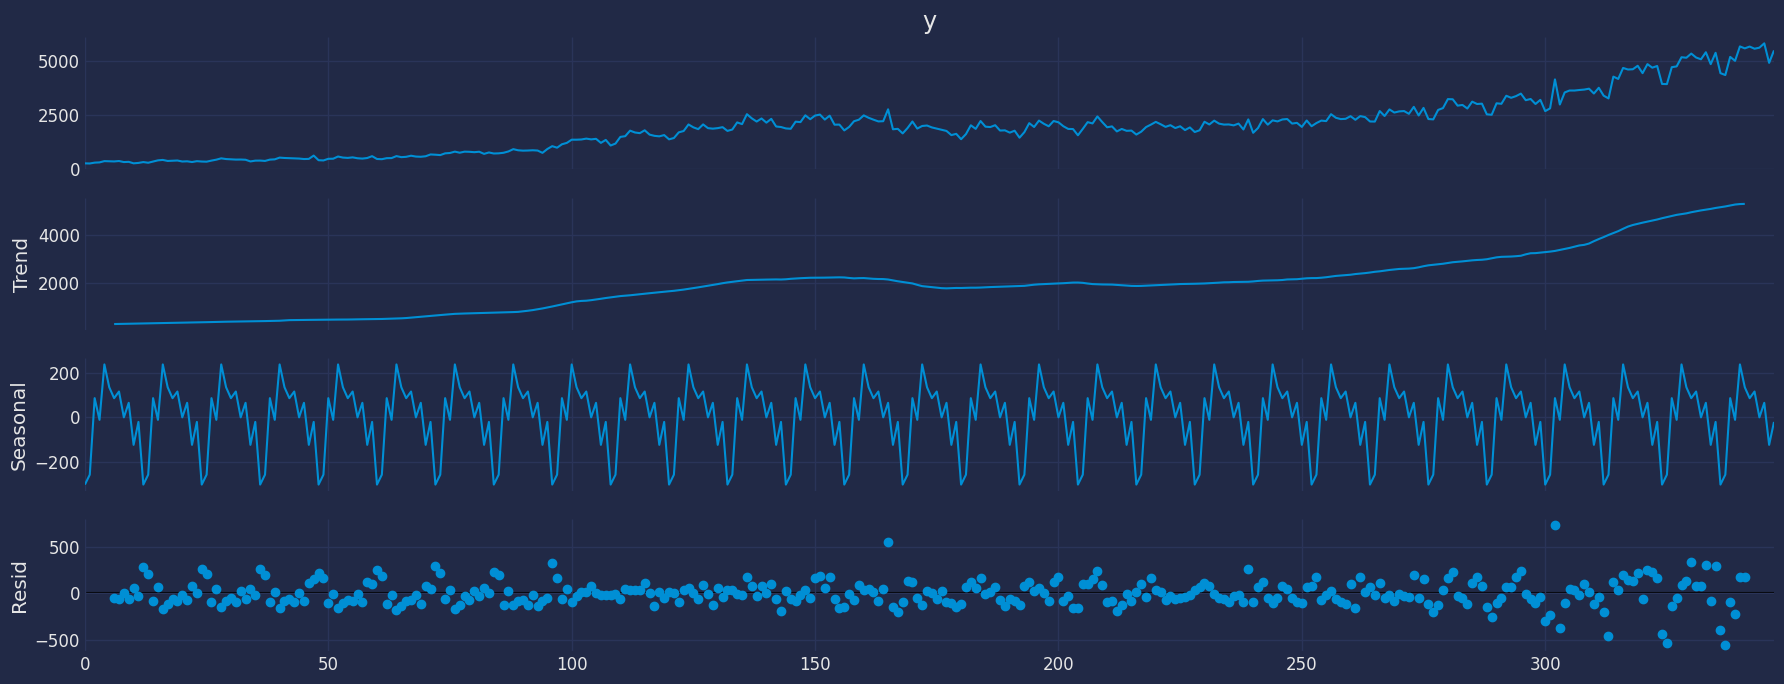

In [8]:
decomposed=seasonal_decompose(df["y"], model = "add", period=12)
decomposed.plot()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [11]:
Augmented_Dickey_Fuller_Test_func(df["y"],"Remesas")

Dickey-Fuller test results for columns: Remesas
Test Statistic                   0.155185
p-value                          0.969633
No Lags Used                    17.000000
Number of observations used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


In [12]:
df1=df.copy()
df1['y_diff'] = df['y'].diff()
df1.dropna(inplace=True)
df1.head()

,ds,y,unique_id,y_diff
1,1995-02-01,248.0605,Remesas,-6.5119
2,1995-03-01,287.3645,Remesas,39.3040
3,1995-04-01,298.9135,Remesas,11.5490
4,1995-05-01,357.7396,Remesas,58.8261
5,1995-06-01,352.3695,Remesas,-5.3701


In [13]:
Augmented_Dickey_Fuller_Test_func(df1["y_diff"],"Remesas diferenciadas")

Dickey-Fuller test results for columns: Remesas diferenciadas
Test Statistic                  -2.510851
p-value                          0.112856
No Lags Used                    17.000000
Number of observations used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


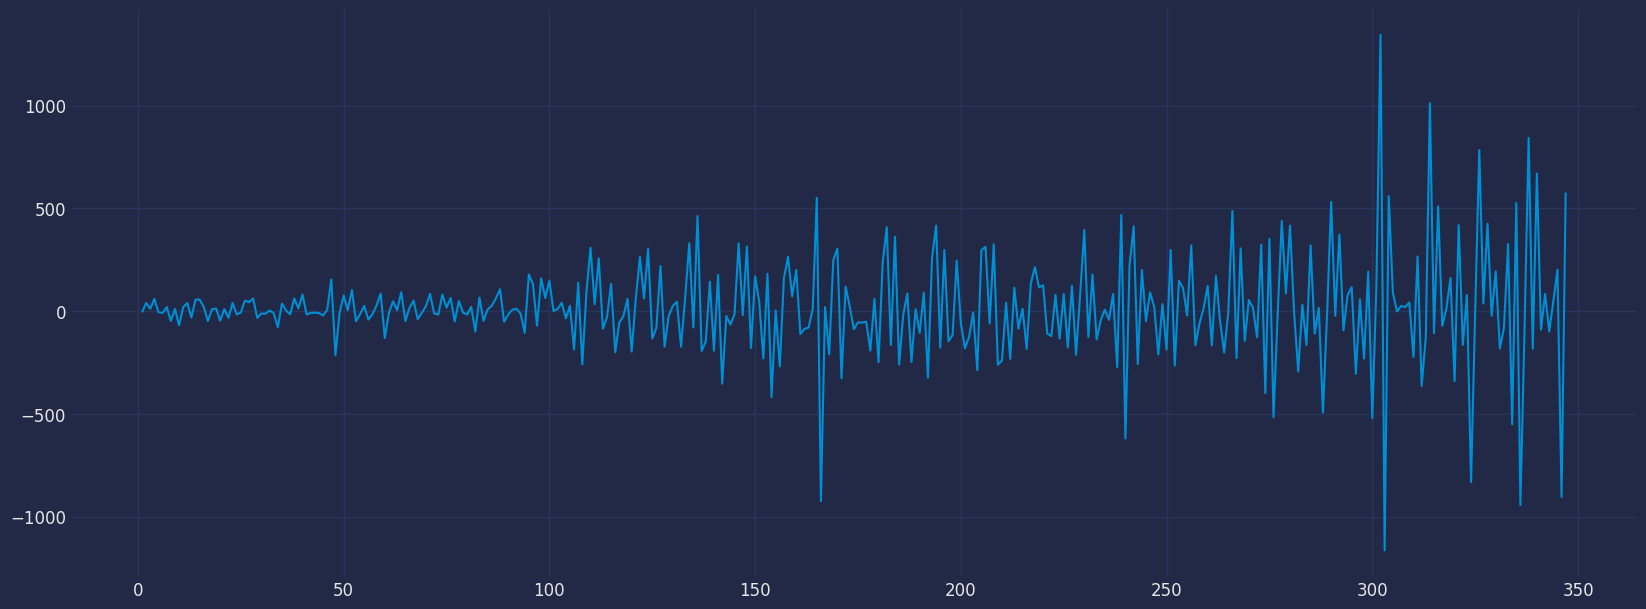

In [14]:
plt.plot(df1["y_diff"])

In [15]:
df1=df.copy()
df1['y_log_diff'] = np.log(df['y']).diff()
df1.dropna(inplace=True)
df1.head()

,ds,y,unique_id,y_log_diff
1,1995-02-01,248.0605,Remesas,-0.025913
2,1995-03-01,287.3645,Remesas,0.147079
3,1995-04-01,298.9135,Remesas,0.039403
4,1995-05-01,357.7396,Remesas,0.179651
5,1995-06-01,352.3695,Remesas,-0.015125


In [16]:
Augmented_Dickey_Fuller_Test_func(df1["y_log_diff"],"Diferencias de logaritmos de la remesas")

Dickey-Fuller test results for columns: Diferencias de logaritmos de la remesas
Test Statistic                  -3.282535
p-value                          0.015677
No Lags Used                    17.000000
Number of observations used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


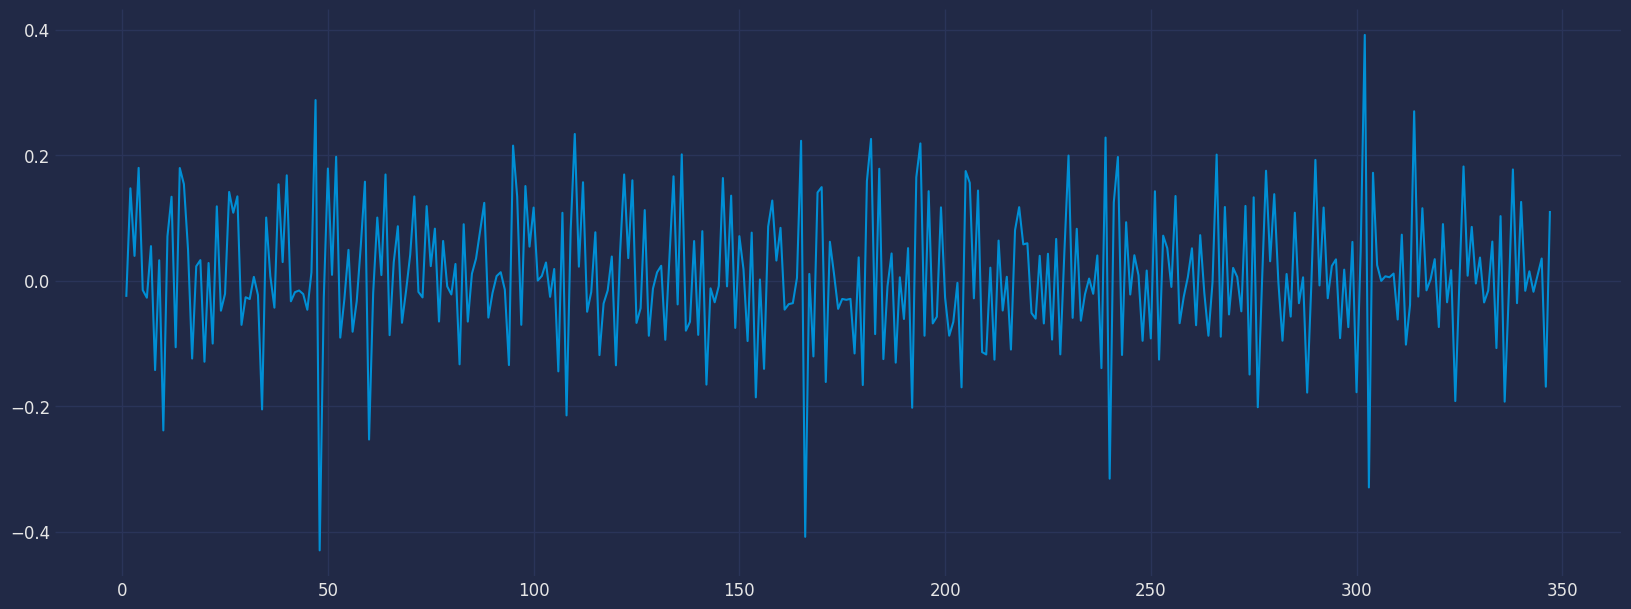

In [17]:
plt.plot(df1['y_log_diff'])

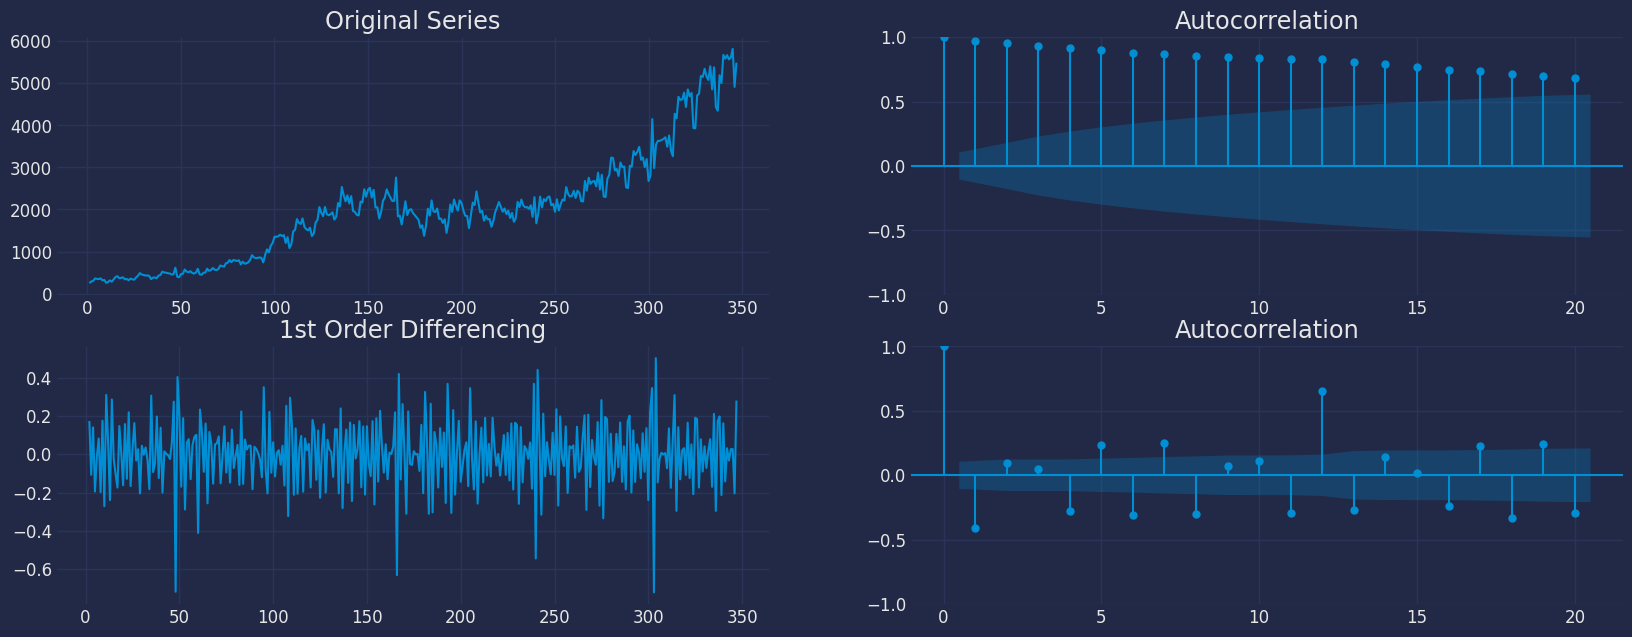

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

axes[1, 0].plot(df1["y_log_diff"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)


plt.show()

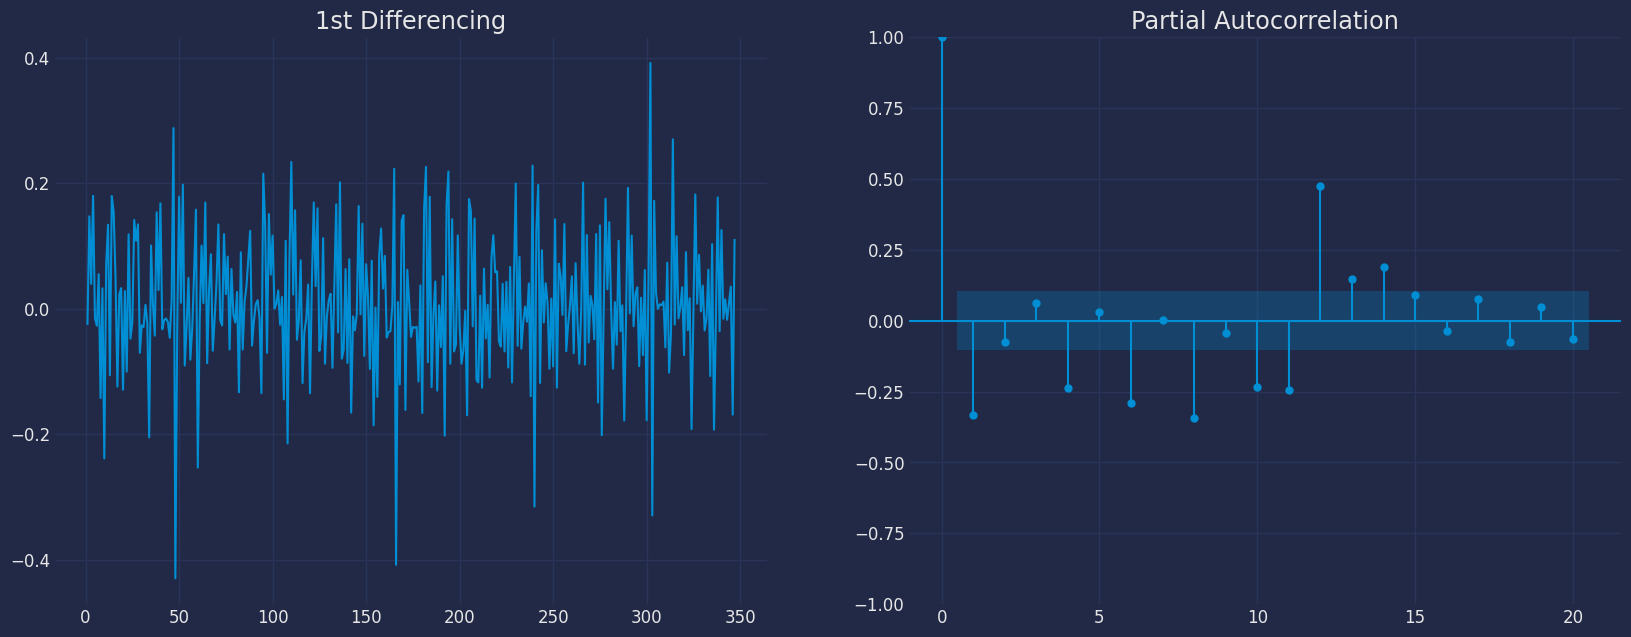

In [19]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y_log_diff"]); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y_log_diff"].dropna(), ax=axes[1],lags=20)

plt.show()

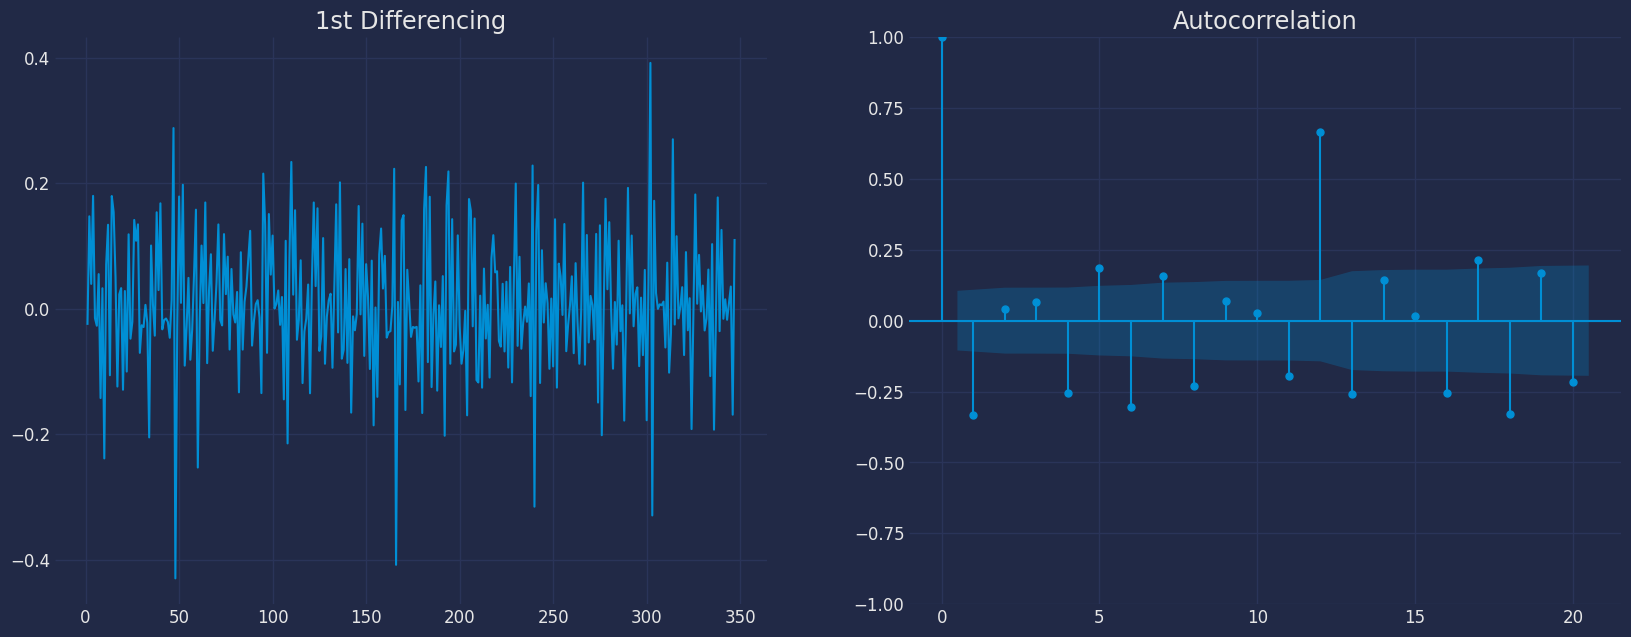

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y_log_diff"]); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df1["y_log_diff"].dropna(), ax=axes[1], lags=20)

plt.show()

In [21]:
df = pd.DataFrame({"ds": df1["ds"], "y": df1["y_log_diff"], "unique_id": "Remesas"})
df.head()

,ds,y,unique_id
1,1995-02-01,-0.025913,Remesas
2,1995-03-01,0.147079,Remesas
3,1995-04-01,0.039403,Remesas
4,1995-05-01,0.179651,Remesas
5,1995-06-01,-0.015125,Remesas


In [24]:
from statsforecast.models import ARIMA

In [25]:
arima = ARIMA(order=(1, 0, 1), season_length=12)

In [26]:
arima = arima.fit(y=df["y"].values)

In [31]:
Y_hat_df=arima.forecast(y=df["y"].values, h=6, fitted=True)

In [32]:
forecast=pd.Series(pd.date_range("2023-07-01", freq="MS", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast

,ds
0,2023-07-01
1,2023-08-01
2,2023-09-01
3,2023-10-01
4,2023-11-01
5,2023-12-01


In [33]:
df=df.set_index("ds")

In [ ]:
forecast["unique_id"]="Remesas"
forecast["hat"]=y_hat_dict.get("mean")
forecast["lo-95"]=y_hat_dict2.get("lo-95")
forecast["hi-95"]=y_hat_dict2.get("hi-95")
forecast=forecast.set_index("ds")
forecast

,unique_id,hat,lo-95,hi-95
ds,,,,
2023-06-01,Remesas,-0.012596,-0.214838,0.189646
2023-07-01,Remesas,0.011160,-0.203580,0.225900
2023-08-01,Remesas,0.008529,-0.206359,0.223417
2023-09-01,Remesas,0.008820,-0.206070,0.223711
2023-10-01,Remesas,0.008788,-0.206102,0.223678
2023-11-01,Remesas,0.008792,-0.206098,0.223682


In [40]:
Y_hat_df['fitted'].shape, df['y'].shape

((347,), (347,))

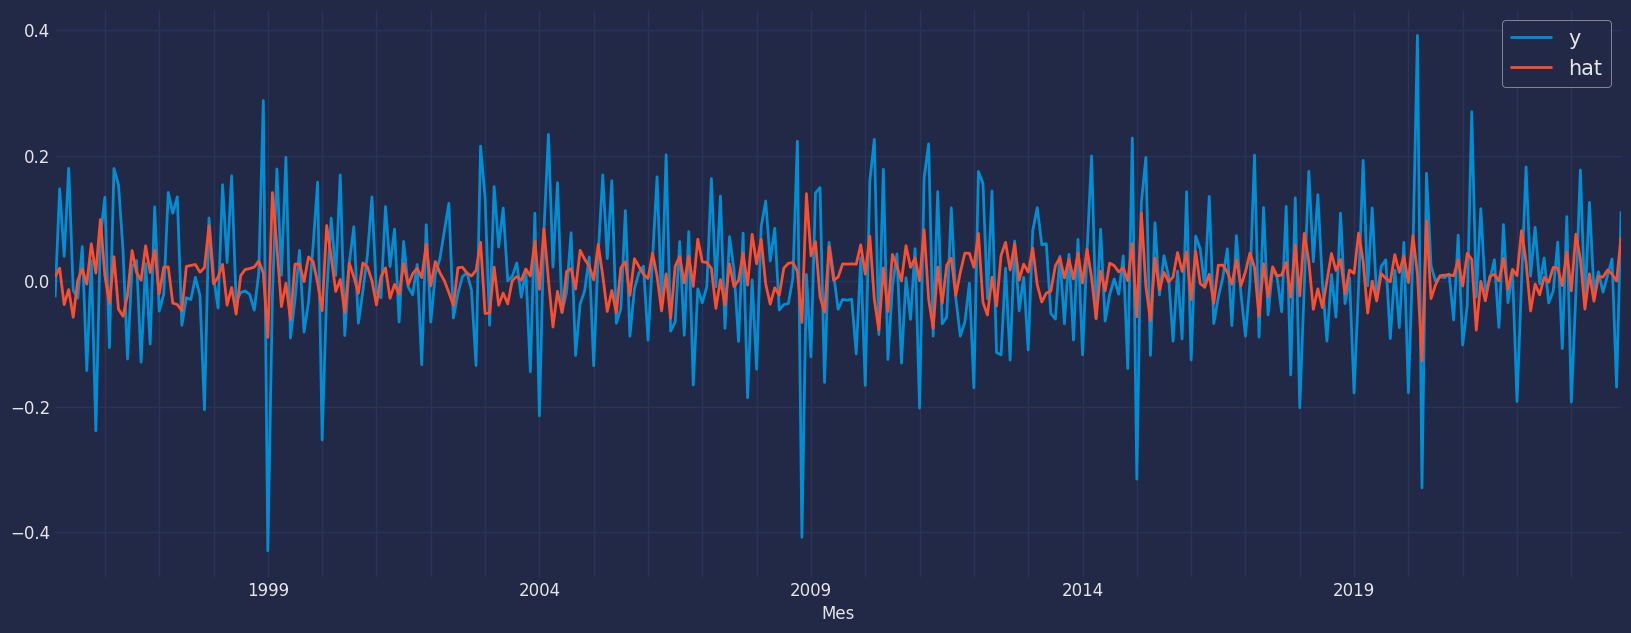

In [43]:
_, ax = plt.subplots(1, 1)
df_plot = df.copy()
df_plot['hat'] = Y_hat_df['fitted']
df_plot[['y', 'hat']].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)

In [47]:
data.head()

,Fecha,Value
0,1995-01-01,254.5724
1,1995-02-01,248.0605
2,1995-03-01,287.3645
3,1995-04-01,298.9135
4,1995-05-01,357.7396


In [46]:
df['hat'] = Y_hat_df['fitted']
df.head()

,y,unique_id,hat
ds,,,
1995-02-01,-0.025913,Remesas,0.006749
1995-03-01,0.147079,Remesas,0.020640
1995-04-01,0.039403,Remesas,-0.037530
1995-05-01,0.179651,Remesas,-0.013533
1995-06-01,-0.015125,Remesas,-0.057692


In [48]:
data['log'] = np.log(data['Value'])
data['log_diff'] = data['log'].diff()
data.head()

,Fecha,Value,log,log_diff
0,1995-01-01,254.5724,5.539585,NaN
1,1995-02-01,248.0605,5.513673,-0.025913
2,1995-03-01,287.3645,5.660751,0.147079
3,1995-04-01,298.9135,5.700154,0.039403
4,1995-05-01,357.7396,5.879805,0.179651


In [49]:
import numpy as np

In [53]:
df['hat_diff'] = np.r_[data['log'].iloc[0], df['hat']].cumsum()[1:]

In [57]:
df['hat_diff_log'] = np.exp(df['hat_diff'])

In [61]:
df['remesas'] = data['Value'].values[1:]

In [62]:
df.head()

,y,unique_id,hat,hat_diff,hat_diff_log,remesas
ds,,,,,,
1995-02-01,-0.025913,Remesas,0.006749,5.546334,256.296253,248.0605
1995-03-01,0.147079,Remesas,0.020640,5.566974,261.641120,287.3645
1995-04-01,0.039403,Remesas,-0.037530,5.529444,252.003811,298.9135
1995-05-01,0.179651,Remesas,-0.013533,5.515911,248.616432,357.7396
1995-06-01,-0.015125,Remesas,-0.057692,5.458219,234.679143,352.3695


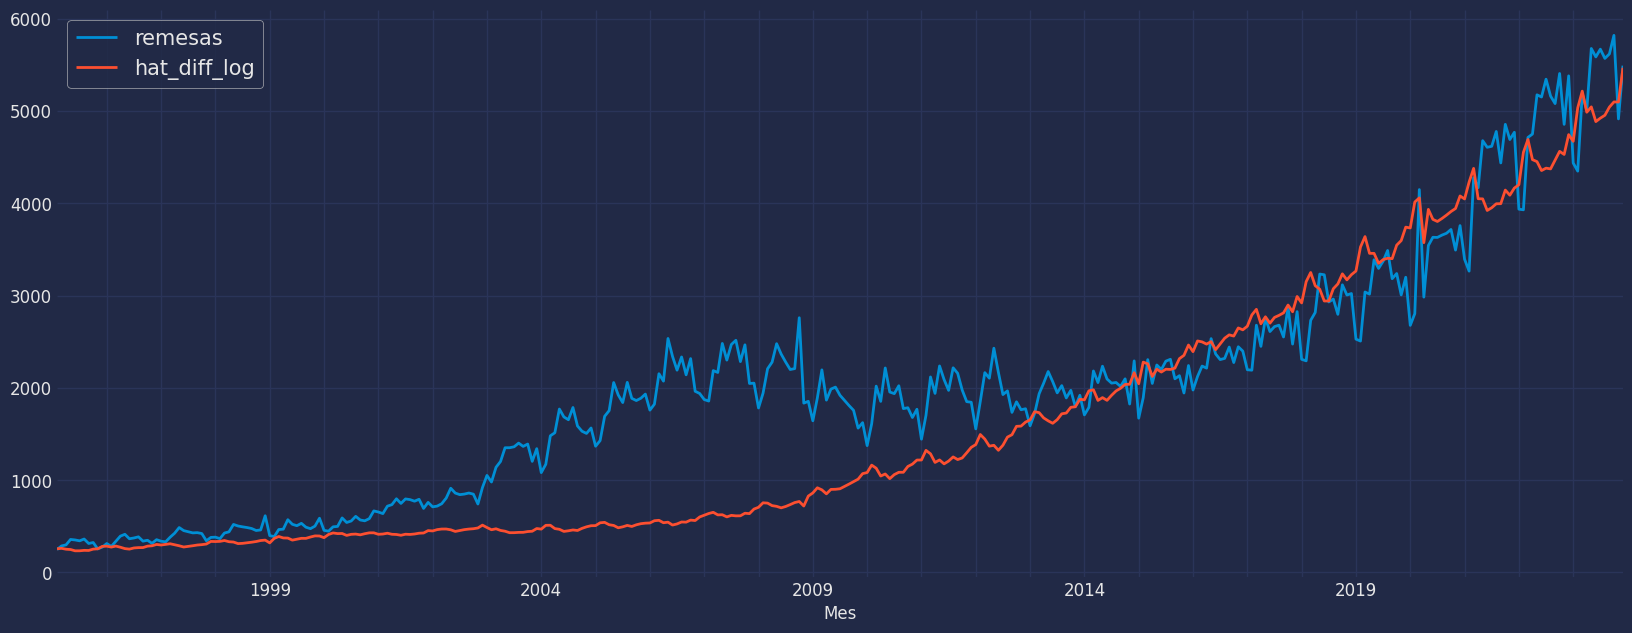

In [63]:
_, ax = plt.subplots(1, 1)
df[['remesas', 'hat_diff_log']].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)

## Usa auto ARIMA

In [64]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

In [65]:
models = [AutoARIMA(season_length=12)]

In [66]:
Y_train_df = pd.DataFrame({"ds": df1["ds"], "y": df1["y_log_diff"], "unique_id": "Remesas"})

In [67]:
models = [AutoARIMA(season_length=12)]
sf = StatsForecast(df=Y_train_df,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [68]:
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [69]:
arima_string(sf.fitted_[0,0].model_)

'ARIMA(4,0,0)(1,1,1)[12]                   '

In [70]:
result=sf.fitted_[0,0].model_
print(result.keys())
print(result['arma'])

dict_keys(['coef', 'sigma2', 'var_coef', 'mask', 'loglik', 'aic', 'arma', 'residuals', 'code', 'n_cond', 'nobs', 'model', 'bic', 'aicc', 'ic', 'xreg', 'x', 'lambda'])
(4, 0, 1, 1, 12, 0, 1)


In [71]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual

,residual Model
0,-0.000026
1,0.000147
2,0.000039
3,0.000180
4,-0.000015
...,...
342,-0.012021
343,0.046424
344,0.000185
345,-0.074529


In [73]:
import seaborn as sns
from scipy import stats

<ipython-input-74-954e1796f46e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, ax=axs[0,1]);


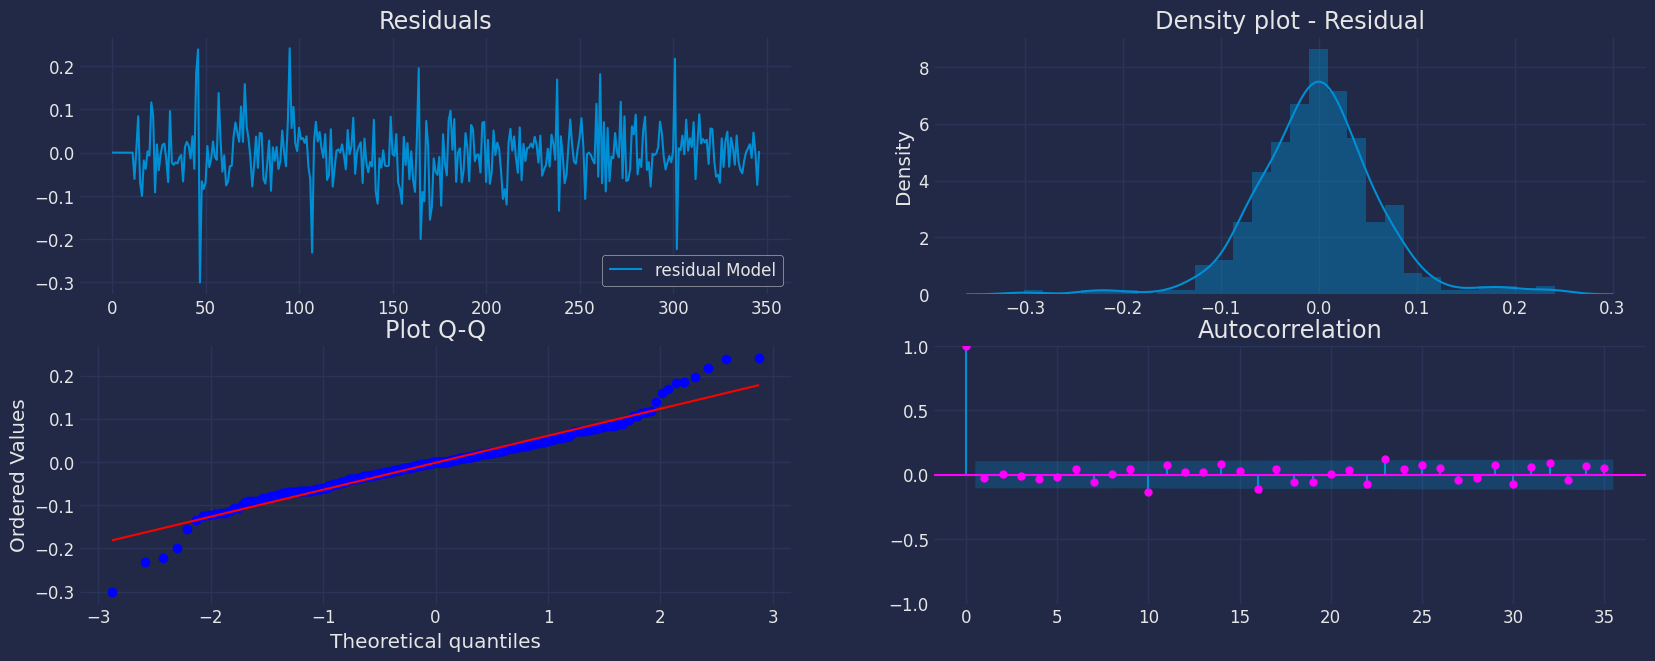

In [74]:
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

In [75]:
Y_hat_df = sf.forecast(6, fitted=True)

Y_hat_df.head()


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA
unique_id,,
Remesas,2024-01-01,-0.154659
Remesas,2024-02-01,0.004698
Remesas,2024-03-01,0.197038
Remesas,2024-04-01,-0.048332
Remesas,2024-05-01,0.121936


In [76]:
values=sf.forecast_fitted_values()
values

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,y,AutoARIMA
unique_id,,,
Remesas,1995-02-01,-0.025913,-0.025887
Remesas,1995-03-01,0.147079,0.146932
Remesas,1995-04-01,0.039403,0.039363
Remesas,1995-05-01,0.179651,0.179471
Remesas,1995-06-01,-0.015125,-0.015110
...,...,...,...
Remesas,2023-08-01,-0.017772,-0.005751
Remesas,2023-09-01,0.008662,-0.037762
Remesas,2023-10-01,0.035190,0.035006


In [77]:
df.head()

,y,unique_id,hat,hat_diff,hat_diff_log,remesas
ds,,,,,,
1995-02-01,-0.025913,Remesas,0.006749,5.546334,256.296253,248.0605
1995-03-01,0.147079,Remesas,0.020640,5.566974,261.641120,287.3645
1995-04-01,0.039403,Remesas,-0.037530,5.529444,252.003811,298.9135
1995-05-01,0.179651,Remesas,-0.013533,5.515911,248.616432,357.7396
1995-06-01,-0.015125,Remesas,-0.057692,5.458219,234.679143,352.3695


In [88]:
df['AutoARIMA'] = values['AutoARIMA'].values
df['AutoARIMA_diff'] = np.r_[data['log'].iloc[0], df['AutoARIMA']].cumsum()[1:]
df.head()

,y,unique_id,hat,hat_diff,hat_diff_log,remesas,AutoARIMA,AutoARIMA_diff,AutoARIMA_diff_log
ds,,,,,,,,,
1995-02-01,-0.025913,Remesas,0.006749,5.546334,256.296253,248.0605,-0.025887,5.513699,0.974445
1995-03-01,0.147079,Remesas,0.020640,5.566974,261.641120,287.3645,0.146932,5.660630,1.128676
1995-04-01,0.039403,Remesas,-0.037530,5.529444,252.003811,298.9135,0.039363,5.699994,1.173990
1995-05-01,0.179651,Remesas,-0.013533,5.515911,248.616432,357.7396,0.179471,5.879465,1.404779
1995-06-01,-0.015125,Remesas,-0.057692,5.458219,234.679143,352.3695,-0.015110,5.864355,1.383712


In [89]:
df['AutoARIMA_diff_log'] = np.exp(df['AutoARIMA_diff'])

In [90]:
df.tail()

,y,unique_id,hat,hat_diff,hat_diff_log,remesas,AutoARIMA,AutoARIMA_diff,AutoARIMA_diff_log
ds,,,,,,,,,
2023-08-01,-0.017772,Remesas,0.006338,8.507631,4952.417593,5568.2127,-0.005751,9.225317,10150.892612
2023-09-01,0.008662,Remesas,0.017669,8.525300,5040.700089,5616.6566,-0.037762,9.187555,9774.725346
2023-10-01,0.035190,Remesas,0.011023,8.536323,5096.571659,5817.8272,0.035006,9.222561,10122.954969
2023-11-01,-0.169035,Remesas,-0.000082,8.536241,5096.152979,4913.0348,-0.094506,9.128055,9210.093788
2023-12-01,0.110982,Remesas,0.070081,8.606323,5466.110857,5489.7036,0.107192,9.235247,10252.197724


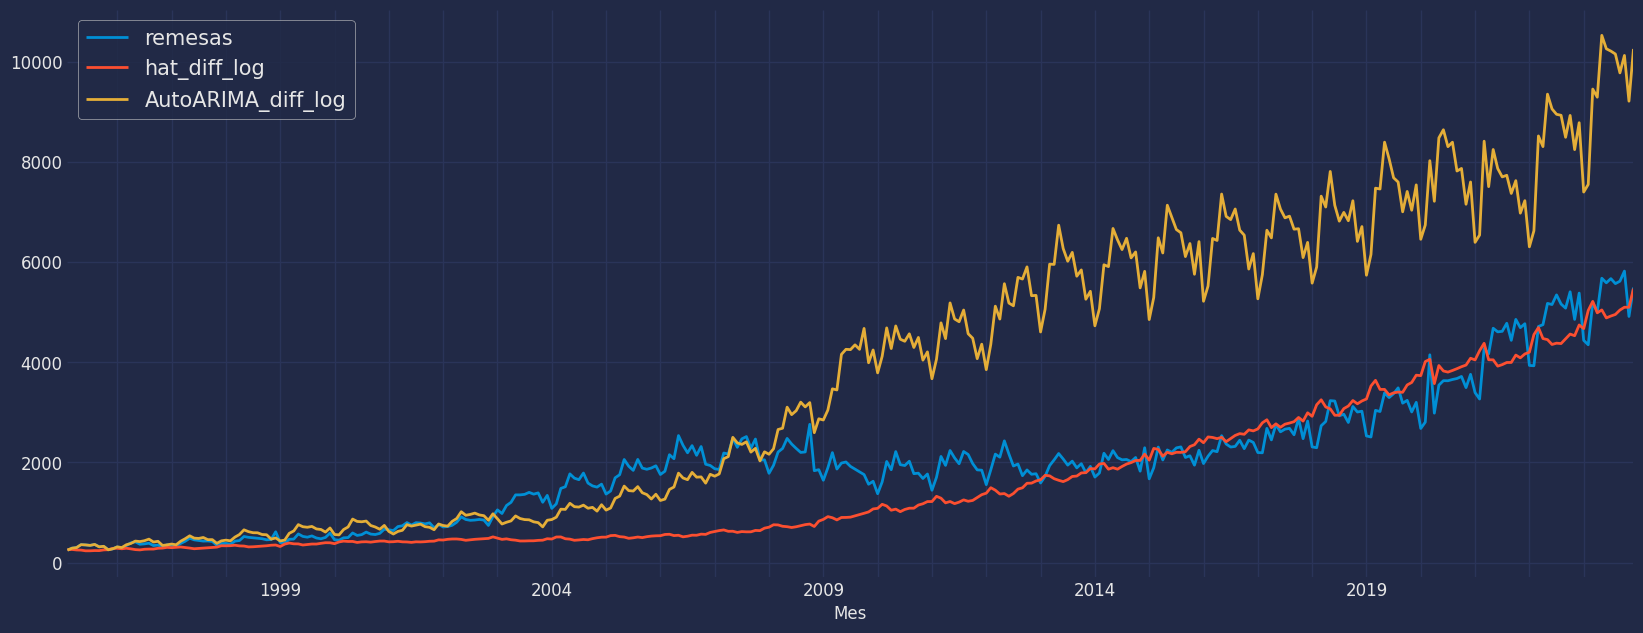

In [91]:
_, ax = plt.subplots(1, 1)
df[['remesas', 'hat_diff_log', 'AutoARIMA_diff_log']].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)

In [92]:
data.head()

,Fecha,Value,log,log_diff
0,1995-01-01,254.5724,5.539585,NaN
1,1995-02-01,248.0605,5.513673,-0.025913
2,1995-03-01,287.3645,5.660751,0.147079
3,1995-04-01,298.9135,5.700154,0.039403
4,1995-05-01,357.7396,5.879805,0.179651


In [93]:
Y_train_df = pd.DataFrame({"ds": df1["ds"], "y": data["Value"].values[1:], "unique_id": "Remesas"})

In [94]:
models = [AutoARIMA(season_length=12)]
sf = StatsForecast(df=Y_train_df,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [95]:
Y_hat_df = sf.forecast(6, fitted=True)
values = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [100]:
sf.fit()
arima_string(sf.fitted_[0,0].model_)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


'ARIMA(0,1,1)(0,1,1)[12]                   '

In [97]:
df['autoarima_original'] = values['AutoARIMA'].values
df.head()

,y,unique_id,hat,hat_diff,hat_diff_log,remesas,AutoARIMA,AutoARIMA_diff,AutoARIMA_diff_log,autoarima_original
ds,,,,,,,,,,
1995-02-01,-0.025913,Remesas,0.006749,5.546334,256.296253,248.0605,-0.025887,5.513699,248.066928,247.917282
1995-03-01,0.147079,Remesas,0.020640,5.566974,261.641120,287.3645,0.146932,5.660630,287.329683,287.270006
1995-04-01,0.039403,Remesas,-0.037530,5.529444,252.003811,298.9135,0.039363,5.699994,298.865508,298.841879
1995-05-01,0.179651,Remesas,-0.013533,5.515911,248.616432,357.7396,0.179471,5.879465,357.617911,357.634337
1995-06-01,-0.015125,Remesas,-0.057692,5.458219,234.679143,352.3695,-0.015110,5.864355,352.254965,352.290387


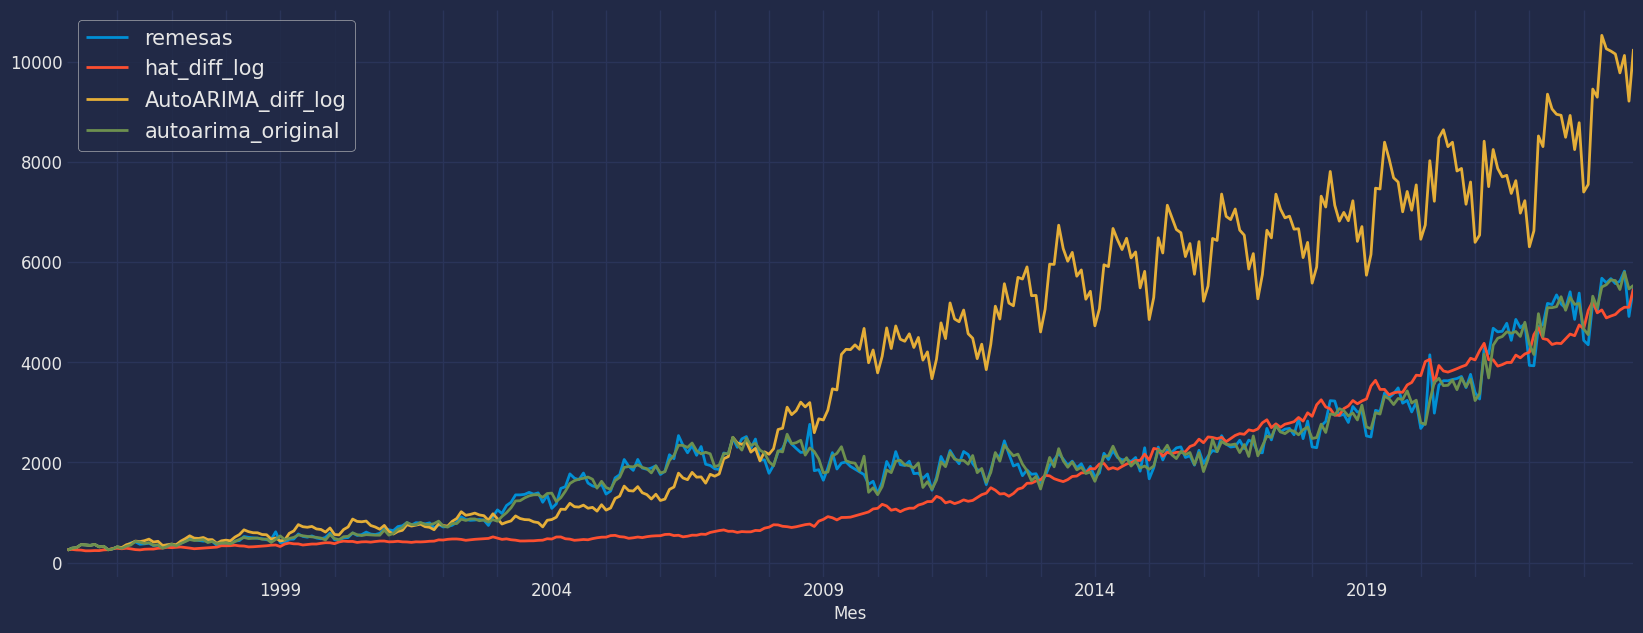

In [98]:
_, ax = plt.subplots(1, 1)
df[['remesas', 'hat_diff_log', 'AutoARIMA_diff_log', 'autoarima_original']].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)